<a href="https://colab.research.google.com/github/nin-ed/NLP-Algorithms/blob/main/Count_Based_Word_Vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import nltk
from nltk.corpus import reuters
import numpy as np
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

In [35]:
nltk.download('reuters')

START_TOKEN = '<START>'
END_TOKEN = '<END>'

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


In [36]:
def read_corpus(category="crude"):
  files = reuters.fileids(category)
  return [[START_TOKEN]+[w.lower() for w in list(reuters.words(f))]+[END_TOKEN] for f in files]

In [37]:
def distinct_no_of_words(corpus):
  words = [y for x in corpus for y in x]
  words = sorted(list(set(words)))
  n_words = len(words)
  return words, n_words

def co_occ_compute(corpus, win_size=4):
  words, n_words = distinct_no_of_words(corpus)
  mat = np.zeros((n_words, n_words))
  word2idx = dict(zip(words, range(n_words)))
  for doc in corpus:
    for i in range(len(doc)):
      start = max(i-win_size, 0)
      end = min(i+win_size+1, len(doc))
      context_words = doc[start:i] + doc[i:end]
      for word in context_words:
        mat[word2idx[word], word2idx[doc[i]]] += 1
  return mat, word2idx

In [38]:
def reduce_to_n(mat, n=2):
  iters = 10
  svd = TruncatedSVD(n_components=n, n_iter=iters)
  return svd.fit_transform(mat)

In [39]:
def plot(mat, word2idx, words):
  plt.figure(figsize=(10, 6))
  for word in words:
    i = word2idx[word]
    emb = mat[i]
    x, y = emb[0], emb[1]
    plt.scatter(x, y, marker='x', color='red')
    plt.text(x, y, word, fontsize=18)
  plt.show()

In [40]:
def main():
  corpus = read_corpus()
  mat_co_occ, word2idx_co_occ = co_occ_compute(corpus)
  mat_redu_co_occ = reduce_to_n(mat_co_occ, n=2)
  mat_lengths = np.linalg.norm(mat_redu_co_occ, axis=1)
  mat_norm = mat_redu_co_occ / mat_lengths[:, np.newaxis]

  words = ['barrels', 'bpd', 'energy', 'industry', 'oil', 'petroleum', 'kuwait', 'venezuela', 'ecuador']
  plot(mat_norm, word2idx_co_occ, words)

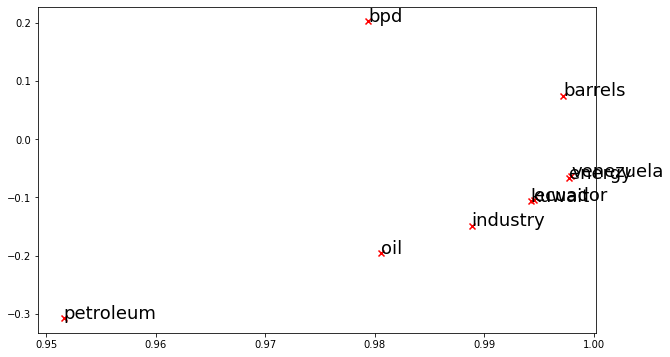

In [41]:
if __name__ == '__main__':
  main()